In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/100_Ca_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,33.5563,32.9459,32.5950,31.9999,32.5492,31.9846,31.6642,32.8086,32.7476,31.9236,...,19.6708,20.2048,20.0980,20.0065,20.4795,21.1356,21.8680,20.7236,20.1285,100Ca/0Que
1,19.9760,20.5405,20.5253,20.1438,19.9302,19.7318,18.9994,19.1367,22.2343,26.5067,...,33.3426,32.4119,32.2288,32.8544,32.7628,32.3051,31.6794,31.6489,32.2135,100Ca/0Que
2,32.3203,32.5645,32.8086,32.9917,32.8544,32.3051,32.5797,29.3296,23.4092,20.7694,...,30.3824,30.3824,31.4811,31.9541,32.4119,32.0457,31.1912,31.4811,31.8473,100Ca/0Que
3,31.2369,31.4200,31.0386,31.3590,32.5187,32.8086,32.1525,31.7252,31.7557,31.6031,...,31.8778,31.9541,32.3661,32.8239,31.9388,30.2756,31.0691,31.8473,32.0151,100Ca/0Que
4,31.5726,31.5269,32.1219,32.1982,31.7252,31.1759,31.0843,31.2217,31.7252,31.2980,...,32.2288,31.4048,31.0538,31.2827,31.1912,31.2369,31.1454,32.2288,32.2898,100Ca/0Que


In [4]:
df.target.unique()

array(['100Ca/0Que', '100Ca/10Que', '100Ca/100Que'], dtype=object)

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,33.5563,32.9459,32.5950,31.9999,32.5492,31.9846,31.6642,32.8086,32.7476,31.9236,...,19.6708,20.2048,20.0980,20.0065,20.4795,21.1356,21.8680,20.7236,20.1285,0
1,19.9760,20.5405,20.5253,20.1438,19.9302,19.7318,18.9994,19.1367,22.2343,26.5067,...,33.3426,32.4119,32.2288,32.8544,32.7628,32.3051,31.6794,31.6489,32.2135,0
2,32.3203,32.5645,32.8086,32.9917,32.8544,32.3051,32.5797,29.3296,23.4092,20.7694,...,30.3824,30.3824,31.4811,31.9541,32.4119,32.0457,31.1912,31.4811,31.8473,0
3,31.2369,31.4200,31.0386,31.3590,32.5187,32.8086,32.1525,31.7252,31.7557,31.6031,...,31.8778,31.9541,32.3661,32.8239,31.9388,30.2756,31.0691,31.8473,32.0151,0
4,31.5726,31.5269,32.1219,32.1982,31.7252,31.1759,31.0843,31.2217,31.7252,31.2980,...,32.2288,31.4048,31.0538,31.2827,31.1912,31.2369,31.1454,32.2288,32.2898,0


# Tree based algorithms

In [6]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [8]:
dtc = DecisionTreeClassifier(max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.64722617 0.65527066 0.65527066 0.64529915]
 CV Mean score: 0.6507666573456047


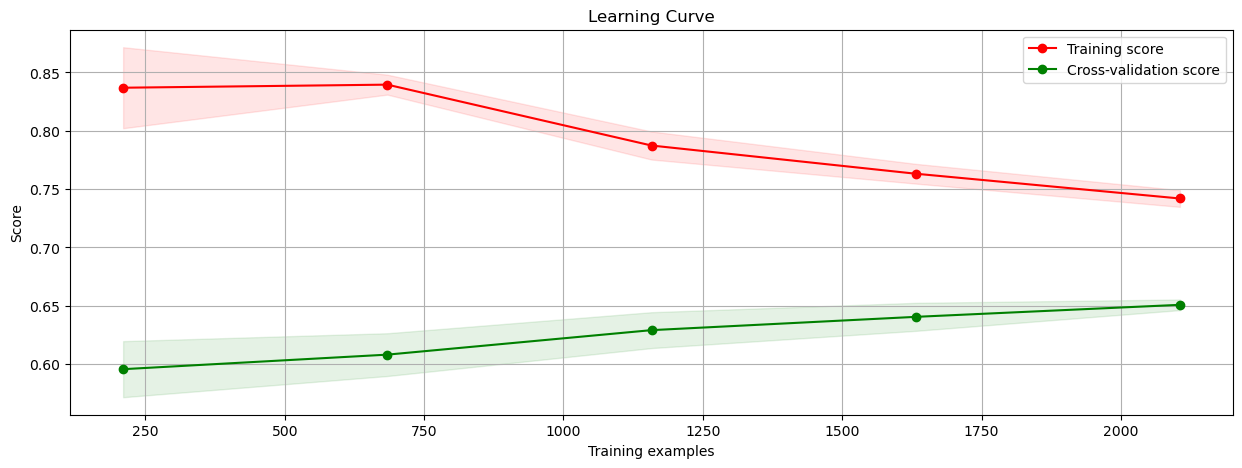

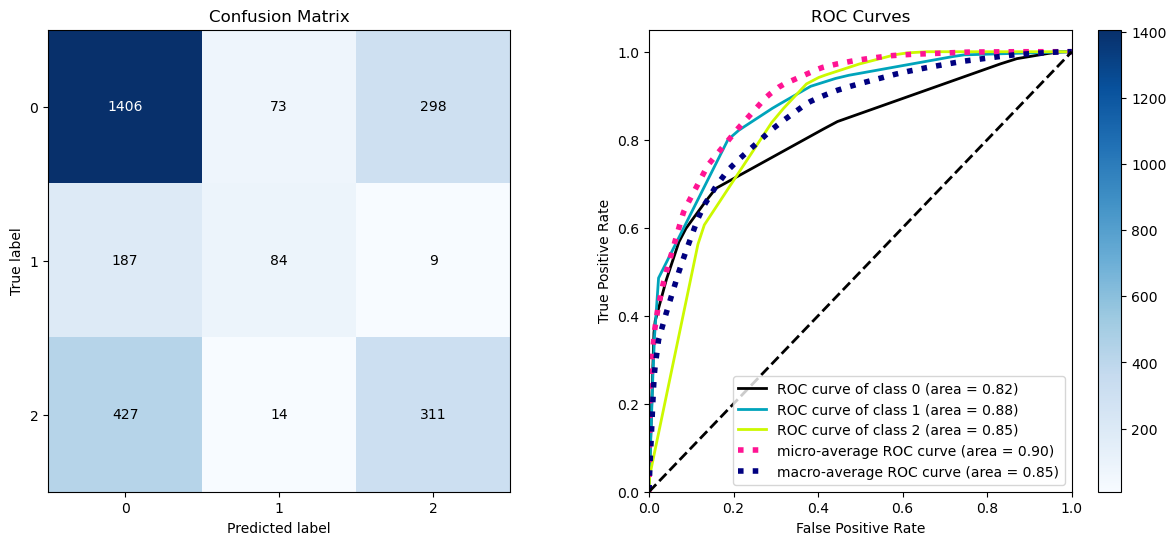

In [9]:
run_model(dtc, X_train, y_train)

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15)

In [11]:
dtc_pred = dtc.predict(X_test)

In [12]:
f1_score(y_test, dtc_pred, average='weighted')

0.6296866039355519

In [13]:
accuracy_score(y_test, dtc_pred)

0.6344238975817923

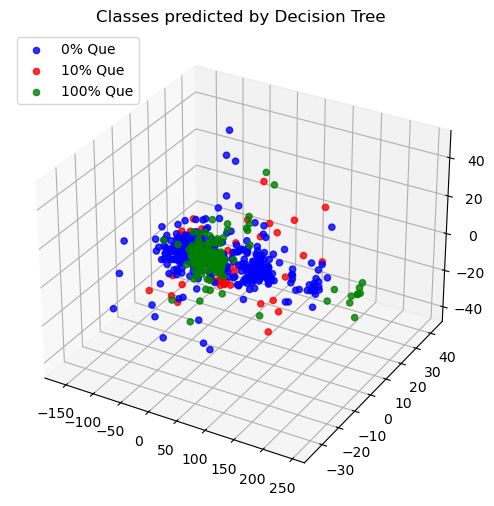

In [14]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Random Forest Classifer

In [15]:
rfc = RandomForestClassifier(n_estimators=35, max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.70554765 0.67663818 0.68803419 0.67094017]
 CV Mean score: 0.6852900471321524


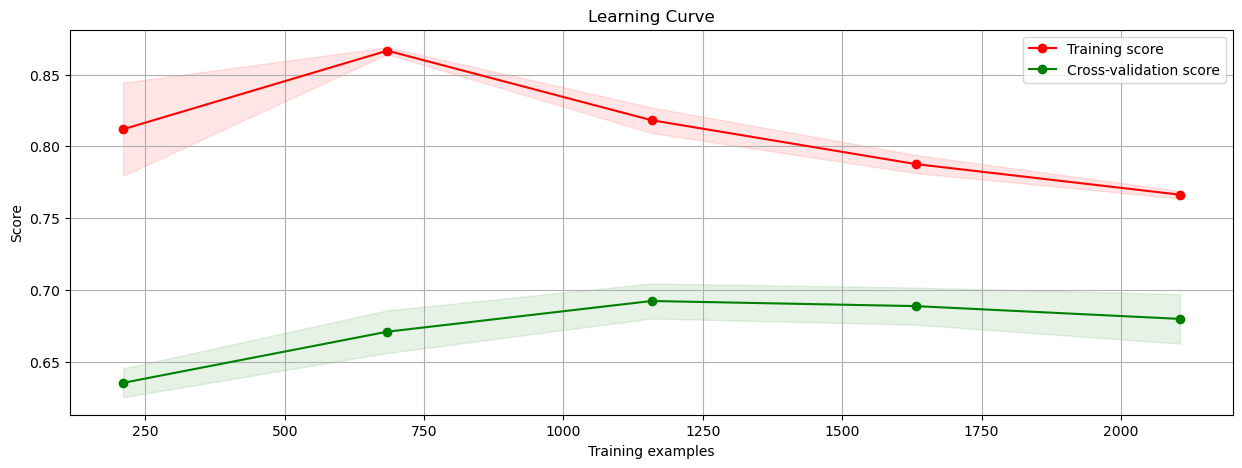

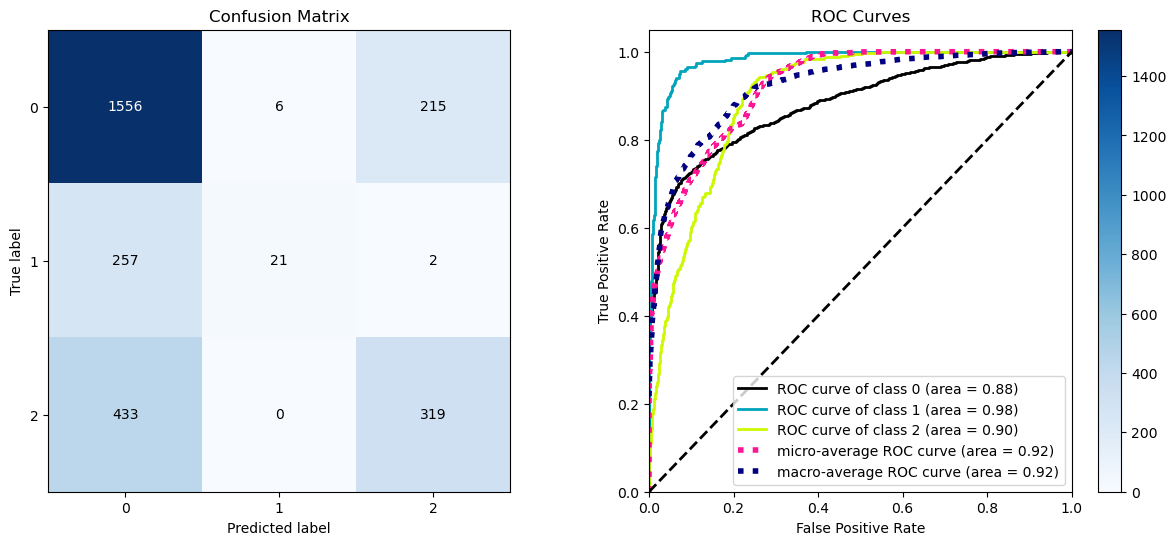

In [16]:
run_model(rfc, X_train, y_train)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15,
                       n_estimators=35)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
f1_score(y_test, rfc_pred, average='weighted')

0.6419203851234034

In [20]:
accuracy_score(y_test, rfc_pred)

0.6856330014224751

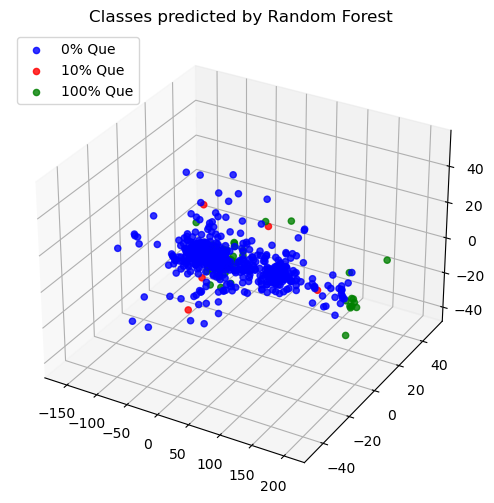

In [21]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Light GBM Classifier

In [22]:
lgbm = LGBMClassifier(n_estimators=15, max_depth=3, min_child_samples=10)

 CV Scores: [0.66145092 0.64672365 0.67806268 0.64672365]
 CV Mean score: 0.6582402240296977


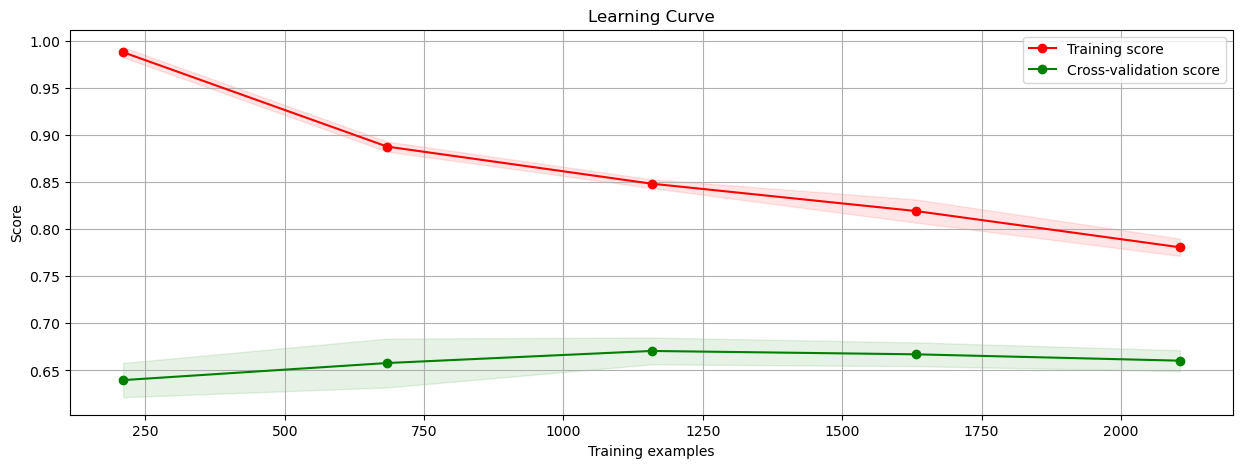

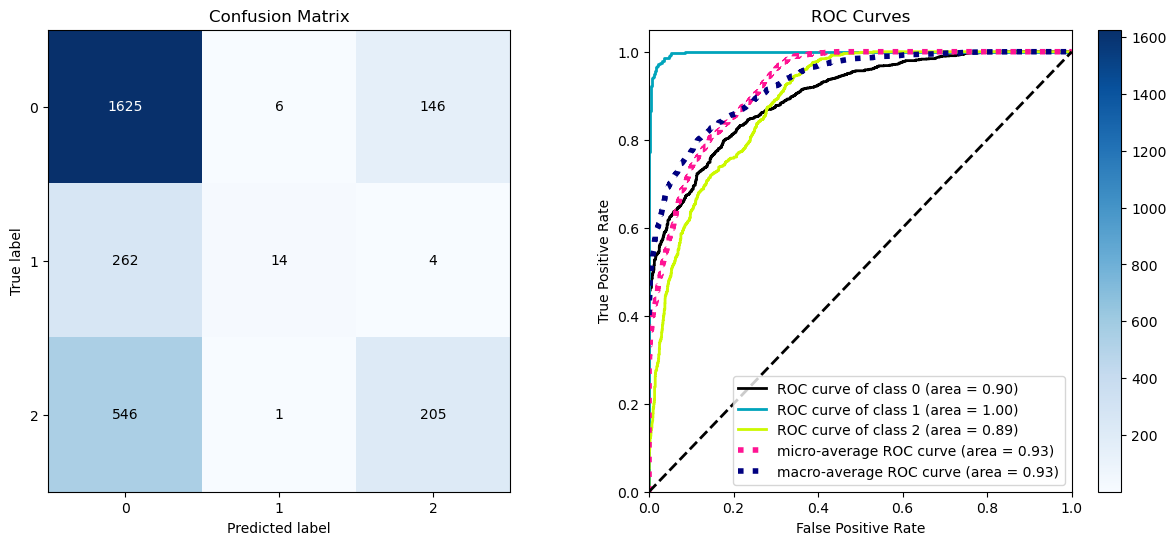

In [23]:
run_model(lgbm, X_train, y_train)

In [24]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=10, n_estimators=15)

In [25]:
lgbm_pred = lgbm.predict(X_test)

In [26]:
f1_score(y_test, lgbm_pred, average='weighted')

0.6032272044826587

In [27]:
accuracy_score(y_test, lgbm_pred)

0.6614509246088194

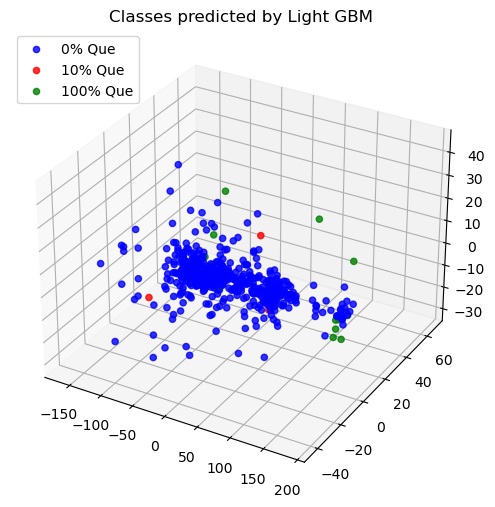

In [28]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Time Series Forest Classifier

In [29]:
tsf = TimeSeriesForest(n_estimators=18, max_depth=6, min_samples_leaf=10)

 CV Scores: [0.76955903 0.8034188  0.79059829 0.77492877]
 CV Mean score: 0.7846262254156992


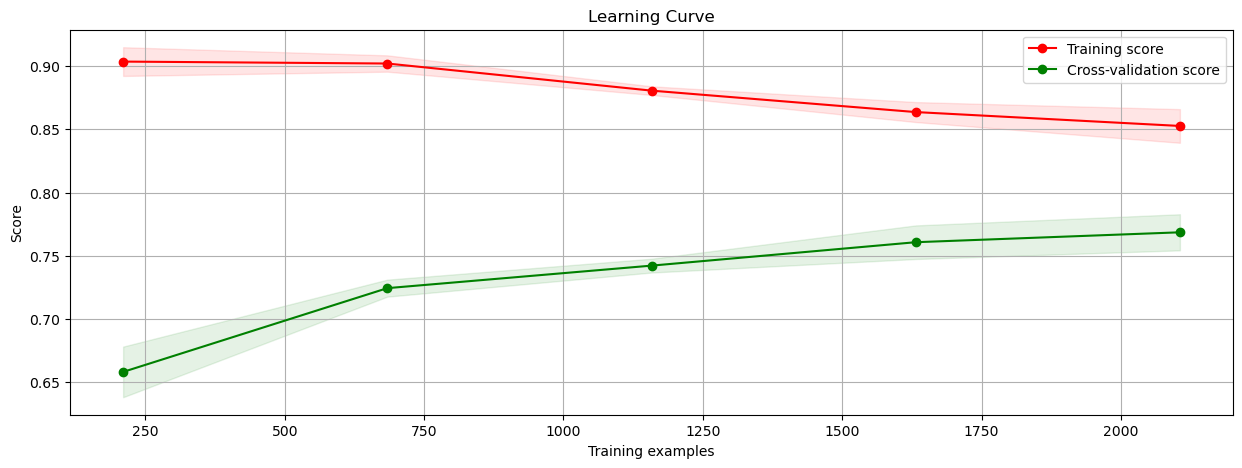

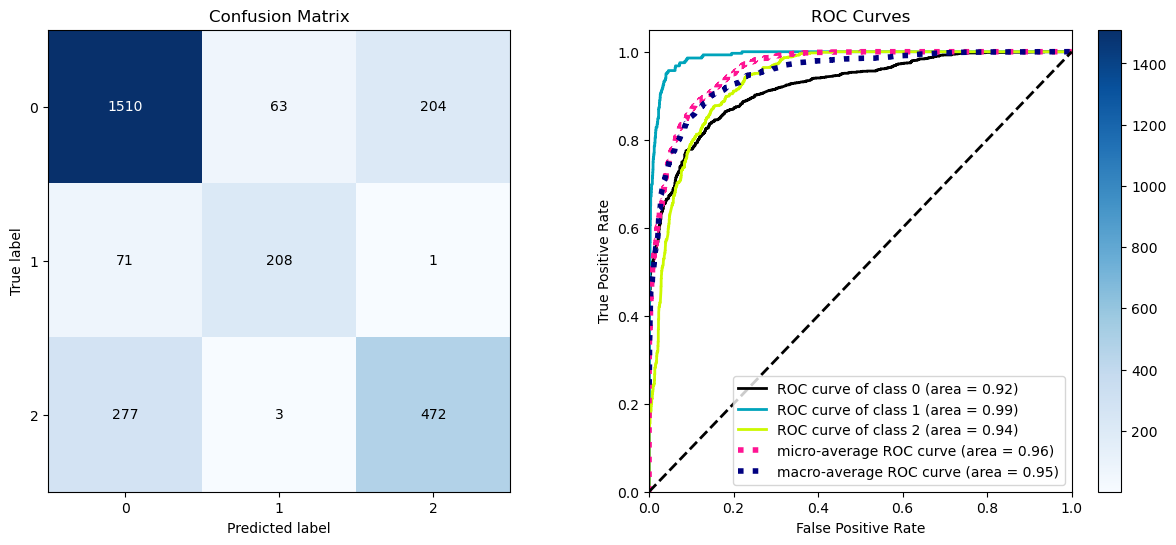

In [30]:
run_model(tsf, X_train, y_train)

In [31]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=6, min_samples_leaf=10, n_estimators=18)

In [32]:
tsf_pred = tsf.predict(X_test)

In [33]:
f1_score(y_test, tsf_pred, average='weighted')

0.7613661107535288

In [34]:
accuracy_score(y_test, tsf_pred)

0.7624466571834992

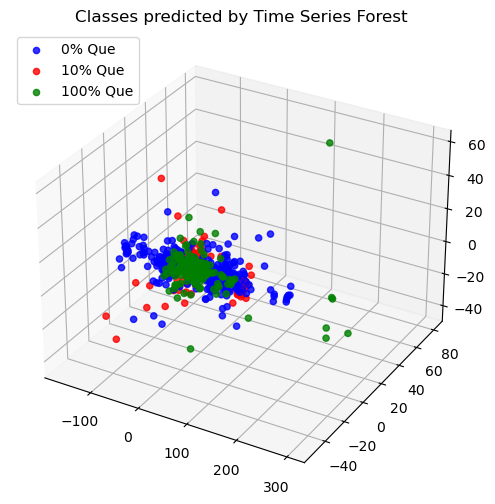

In [35]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## TSBF

In [36]:
tsbf = TSBF(n_estimators=50, max_leaf_nodes=15, max_depth=8, min_samples_leaf=10)

 CV Scores: [0.77240398 0.75783476 0.79487179 0.72792023]
 CV Mean score: 0.7632576908892699


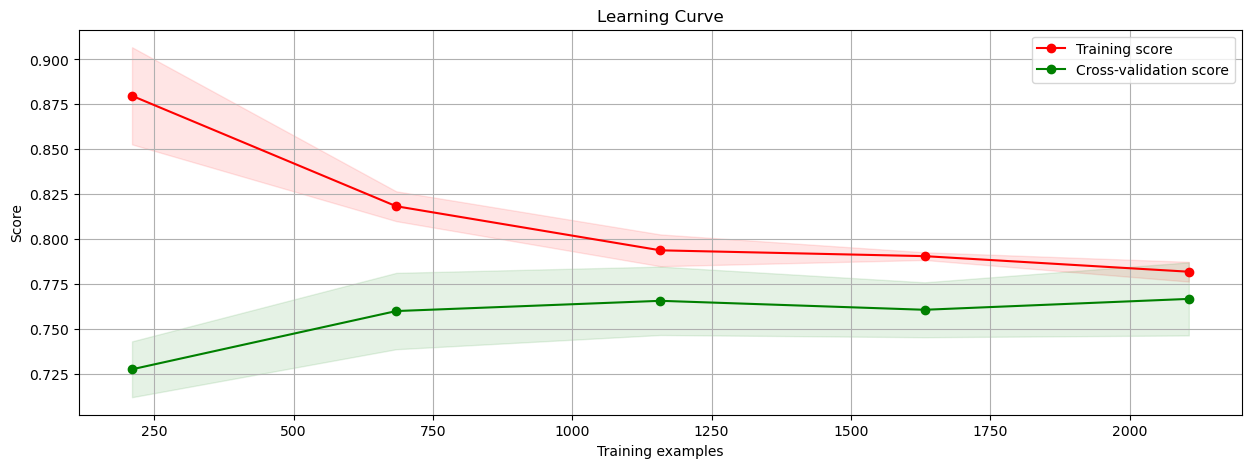

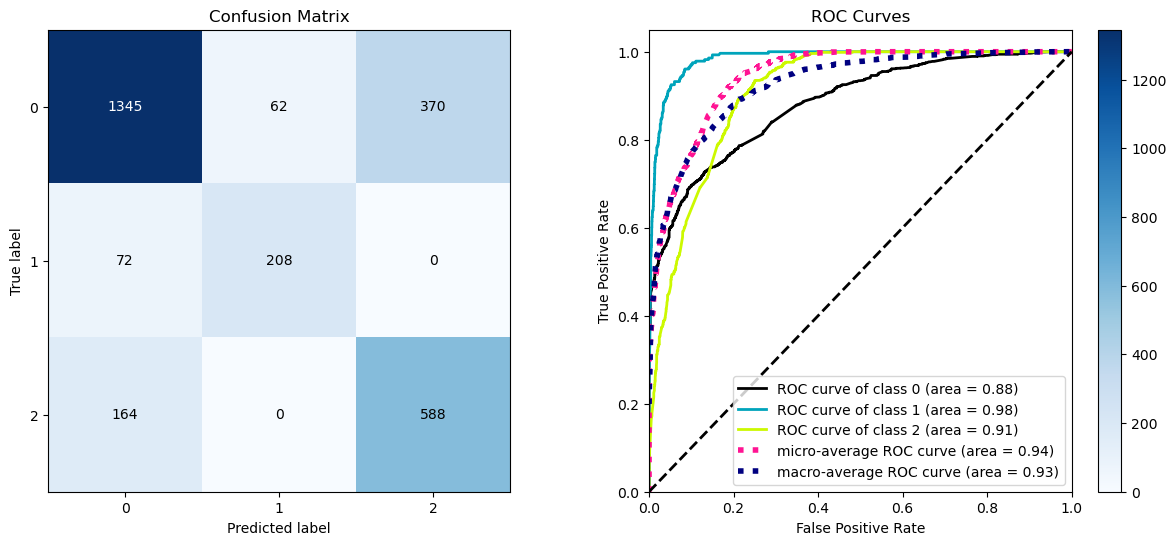

In [37]:
run_model(tsbf, X_train, y_train)

In [38]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=8, max_leaf_nodes=15, min_samples_leaf=10, n_estimators=50)

In [39]:
tsbf_pred = tsbf.predict(X_test)

In [40]:
f1_score(y_test, tsbf_pred, average='weighted')

0.7478465875375561

In [41]:
accuracy_score(y_test, tsbf_pred)

0.7411095305832148

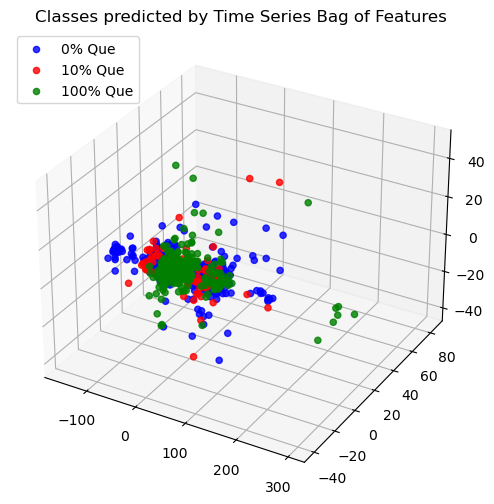

In [42]:
draw_classes_scatterplot(X_test, tsbf_pred, "Classes predicted by Time Series Bag of Features", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])